In [90]:
import re
import sklearn
import numpy as np
import pandas as pd
from wombat.models import Item
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
from wombat.models import dbsession, engine
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,12)


In [63]:
# Make a list of most frequent brands of the form 'BCBG', 'BCBGMAXAZRIA','Alice + Olivia', etc...
top_brands_query = "SELECT brand, count(brand) FROM items WHERE brand != 'LENDER SUBMISSION FILL IN' AND rent_per_week < 1000 GROUP BY brand ORDER BY count(brand) DESC;"
top_brand_df = pd.read_sql_query(top_brands_query, engine)
top_brands = ["\'{}\'".format(brand.replace("'", "''")) for brand in top_brand_df['brand']]
top_brands = ', '.join(top_brands)

<function TextIOWrapper.close>

In [100]:
query = "SELECT brand, item_type, cost, rent_per_week FROM items WHERE brand in ({}) AND rent_per_week < 600".format(top_brands)
df = pd.read_sql_query(query, engine)

# get one-hot columns for brands 
dummy_brands = pd.get_dummies(df['brand'])
print(dummy_brands.columns)
df = pd.concat([df, dummy_brands], axis = 1)

df = df.drop('brand', axis = 1)


# get one-hot columns for item_types
dummified_items = pd.get_dummies(df['item_type'])
df = pd.concat([df, dummified_items], axis = 1)
df = df.drop('item_type', axis = 1)
df

Index(['  Dolce & Gabbana', ' Adrianna Papell', ' Alexia Admor',
       ' Amanda Uprichard', ' Basix II', ' Clover Canyon',
       ' Narciso Rodriguez', ' Trina Turk', '*', '1.State',
       ...
       'valentino garavani', 'vince', 'vintage', 'vintage ',
       'wedding dresstend', 'whatchamacallit', 'worth ', 'yamamoto',
       'yigal azrouel', '🍉'],
      dtype='object', length=1698)


,cost,rent_per_week,Dolce & Gabbana,Adrianna Papell,Alexia Admor,Amanda Uprichard,Basix II,Clover Canyon,Narciso Rodriguez,Trina Turk,...,bags,bottoms,dresses,outerwear,pants,rompers,shirts,shoes,skirts,tops
0,520.0,99.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,695.0,69.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1977.0,125.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,239.0,33.9,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,350.0,45.5,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,349.0,49.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,798.0,89.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,2650.0,110.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,400.0,50.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,292.0,45.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


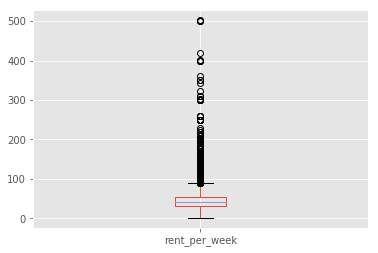

In [77]:
df.boxplot('rent_per_week')

In [78]:
# split data into train and test group
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]

print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:', len(test))

Number of observations in the training data: 4291
Number of observations in the test data: 1470


In [79]:
y = train['rent_per_week']
features = df.columns.drop('rent_per_week') # just column names

In [80]:
clf = RandomForestRegressor()
clf.fit(train[features], train['rent_per_week'])
#joblib.dump(clf, 'rfr_v0.2.pkl')
#call this with: clf = joblib.load('rfr_v0.2.pkl')

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

500.0


500.0

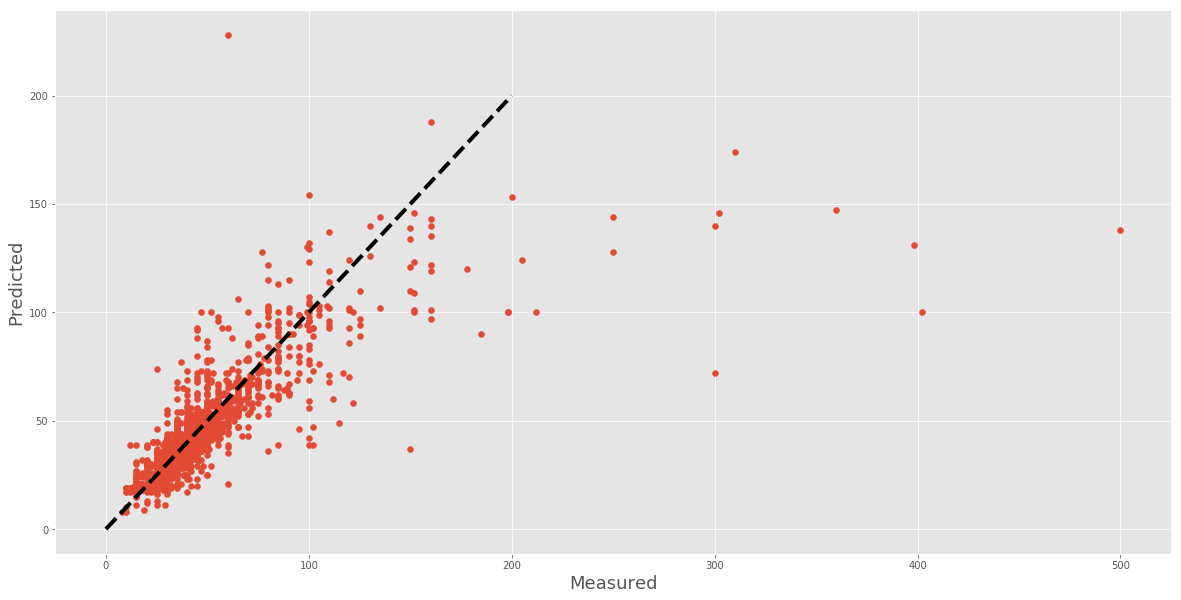

In [99]:
rfr_predicted = clf.predict(test[features]).astype(int)
fig, ax = plt.subplots(figsize=(20, 10))
y = test['rent_per_week']
print(test['rent_per_week'].max())
ax.scatter(x = test['rent_per_week'], y = rfr_predicted)
ax.plot([0, 200], [0, 200], 'k--', lw=4)
ax.set_xlabel('Measured', fontsize=18)
ax.set_ylabel('Predicted', fontsize=18)
y.max()